# Submission 2 - Intermediate

**Instructions**
- Fill out the 'Basic Information' and 'Simple Hypotheses - Findings / Insights' sections (replace the TODOs with your information)
  - If your visualization is interactive, create a short video that shows the interactivity (max. 3 min).
- Export the Jupyter notebook as a HTML file and save it in this repository.
  - Go to 'File' -> 'Save and Export Notebook As..' -> 'HTML'.
  - Save it locally in your project folder. You can leave the name as it is.
  - If you have a video, then add it to the project folder.
  - Push your local changes to the GitHub repository.
- Upload the generated HTML for the Moodle submission.
  - If you have a video, then upload that for the Moodle submission, too.

---
## Basic Information

**Team Name:** VitaminD

**Team Members:**
- k08925980 - Josef Schodl
- k12114346 - Nikola Badjevic
- k01608113 - Hao Zheng
- k12102933 - Hector Auvinen

**Dataset Description:**  
(max. 75 words)

<font size="3">The dataset shows dating behavior gathered from a Speed Dating experiment at a university where the authors hosted multiple dating events.  Furthermore, participants were surveyed about their demographic information, dating behavior, hobbies and what they look for in a partner. Each row presents a date between a participant, a partner, what attributes are important for them and their decisions. Our dataset has a mix of quantitative, ordinal and nominal data.</font>

---
## Simple Hypotheses - Findings / Insights

**Instructions:**
- Add your visualizations (**max. 4**) here
  - The visualizations should show the findings / insights
- Add the descriptions for all your findings / insights (**max. 150 words**)
  - The description should also relate to the visualizations above.

In [1]:
!pip install ipywidgets==8.0.2

  Using cached ipywidgets-8.0.2-py3-none-any.whl (134 kB)
  Using cached widgetsnbextension-4.0.3-py3-none-any.whl (2.0 MB)
  Using cached jupyterlab_widgets-3.0.3-py3-none-any.whl (384 kB)


In [2]:
# Import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from ipywidgets import widgets
from ipywidgets import interact, interact_manual

C:\Users\badja\anaconda3\envs\VisualAnaltics\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Instructions:
- Analyze your dataset using Jupyter Lab (http://jupyter.org/) and the libraries we have presented in the tutorial.
- Start by loading and wrangling your dataset. That includes dealing with missing values and formatting your dataset for later use.
- Explore the two simple hypotheses that are based on one or two attributes of your proposal (see above) and use visualizations to analyze the data and gain insights.
- Design visualizations (max. 4 visualizations) that communicate your key findings effectively. Adhere to the visualization principles and concepts taught in the lecture part.
- Write down your insights/findings for both hypotheses and their visualizations with a maximum of 150 words.

### Data Preprocessing & Cleaning

- handle missing values
- normalize Data -> different event settings: different number of participants - expected # of matches and total matches in % make more sense
- 



In [3]:
# load data
data = pd.read_csv("../data/Speed_Dating_Data.csv", encoding='iso-8859-1')
# get all columns
all_columns = (list(data.columns.values))

In [4]:
print(f"Total Number of Columns: {len(all_columns)}")
missing = data.isna().sum()[data.isna().sum() > 0]
print(f"Number of columns with missing values/nan: {len(data.isna().sum()[data.isna().sum() > 0])}")
# print(data.isna().sum()[data.isna().sum() > 0])
# we see that many of our columns have missing values/ nans, the reason behind that is probably that many participants did not fill out the questions at all timepoints

# depending on the column and attribute type, we handle the data differently - we have to look closer at columns

#display(data["date"])
missing = list(missing.index)

# columns
print(missing)

Total Number of Columns: 195
Number of columns with missing values/nan: 182
['id', 'positin1', 'pid', 'int_corr', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', '

<font size="3">We see that many of the columns, e.g. rating of importance of different attributes( attractiveness, intelligence, fun, ambition, sincerity) or activities(sports, dining, etc) are related to the questionnaire the participants had to fill out before, during and after the dating event. Their missing values can be handled by replacing them with 0 since these columns are quantitative. Some other columns were ordinal, from 1 to N., the missing values are replaced with 0 as well, meaning that the participant did not answer the question. For other columns, we have to take a closer look on the column and its data to find a suitable replacement for nan values.
Some columns with missing values will be dropped since they are not needed for our hypotheses.</font>

In [5]:
# start from career_c(categorial) - encoded in numbers, 0 -> not answered)
# til end ( ratings of attributes, interests - all quantitative)

# goal, date, go_out, imprelig, imprace - ordinal, replace with 0 ->meaning "not answered" or " not specified"
# income, tuition - quant, no income = 0
# race, race_o - categorial encoded in numbers 1-6 -> 0 means not answered

# zipcode not relevant for us -> omit column
# career is word -> "not answered"
# career_c is encoded in integers, replace with 15 = "Other"
# mn_sat: median SAT score of university the person is attending - omit column since not important to our hypotheses
# undergr: undergrad school - replace with "Other"
# field_cd( field coded with numbers) - replace with 18 = "Other"
# field: replace with "Other"

# age, age_o: a few people did not tell their age -> replace with average age
# met_o( has the partner met you before before) : replace with 2 for "no"
# prob_o: 0 for "not answered"

# attr_0, pf_o_att: 0 for "not answered"

# int_corr: not relevant, omit column - we don't use it
# pid: look up wave and who the partner most likely was
# positin1: station number where started -refers to starting table, not relevant for our hypotheses
# id: just missing the id of person -> its




In [6]:
# replace nans in quantitative & ordinal columns with 0
print(f"Columsn with nans: {missing}")
missing_quant_ord = missing[missing.index('career_c'):]
missing_quant_ord.extend(["goal", "date", "go_out", "income", "tuition", "imprelig", "imprace", "race",'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha'])


data.update(data[missing_quant_ord].fillna(0))

#print(missing2)

# drop not-needed columns

omit_columns = ["zipcode", "mn_sat", "int_corr", "positin1"]

data.drop(omit_columns, axis=1, inplace=True)


# columns with nans: only 11 now 

# replace nan in categorial columns with "Other", "no answer" or most fitting value provided in the data key
data.update(data[["from", "career"]].fillna("no answer"))

# we replcae the nan in career_c with 15 which stands for "Other" since it seems the most fitting
data.update(data["career_c"].fillna(15))

# we replace the nan in field_c with 18 which stands for "Other" since it seems the most fitting
data.update(data["field_cd"].fillna(18))

# we replace the nan in age and age_o with the average age of all participants
df_age = data.loc[:, ["iid","age"]]
df_age.drop_duplicates(inplace=True)
avg_age = round(df_age["age"].mean(), 2)

data.update(data[["age", "age_o"]].fillna(avg_age))


# met_o( has the partner met you before before) : replace with 2 for "no"
data.update(data["met_o"].fillna(2))


missing_categorial = ["undergra", "field"]
data.update(data[missing_categorial].fillna("other"))


missing3 = data.isna().sum()[data.isna().sum() > 0]
print(f"Current columns with missing values: \n{missing3}")

Columsn with nans: ['id', 'positin1', 'pid', 'int_corr', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 'sin

In [7]:
# find out race of partner via given partner' id( pid)

pids = data["pid"].loc[data["race_o"].isna()].drop_duplicates().to_list()

# now let find out the race of these people and add them to the race_o column
print(pids)
# pids_race = data.loc[:,["iid","race"]].loc[data["iid"]. in pids].drop_duplicates()
# pids_race
# data - pid in pids -> replace nan in race_o based on pid
missing_race_o = (data.loc[:,["iid", "race"]].loc[(data["iid"] == 58.0) | (data["iid"] == 59.0)  | (data["iid"] == 136.0) | (data["iid"] == 339.0) | (data["iid"] == 340.0) | (data["iid"] == 346.0)]).drop_duplicates()
print(missing_race_o)

data.update(data["race_o"].fillna(0))
print(f"Columns with missing values now:")
print(data.isna().sum()[data.isna().sum() > 0])

[58.0, 59.0, nan, 136.0, 339.0, 340.0, 346.0]
      iid  race
828    58   0.0
838    59   0.0
1866  136   0.0
5004  339   0.0
5014  340   0.0
5114  346   0.0
Columns with missing values now:
id      1
pid    10
dtype: int64


<font size="3">Race of participants is 0 which is not encoded in the data key. We assume 0 means "no answer" and replace the corresponding nan values in the race_o(race of partner) columnn.

To find suitable replacements for the one "id" and "pid", we go through the data manually to see which paritipants' iid/ pid were missing or forgotten.
</font>

In [8]:
display(data.loc[data["id"].isna()])
print(f"Apparrently, the id of participant 552 is missing which can be easily found by checking the rows around")

display(data.iloc[8370:])
print(f"We see that the id of the participant is 22 since it is the same person in the same wave(=event), so we just replace it with 22")

data.update(data["id"].fillna(22.0))


print(data.isna().sum()[data.isna().sum() > 0])

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
8377,552,NaN,1,44,2,21,22,2,15,22,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


Apparrently, the id of participant 552 is missing which can be easily found by checking the rows around


,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
8370,552,22.0,1,44,2,21,22,5,18,15,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8371,552,22.0,1,44,2,21,22,11,2,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8372,552,22.0,1,44,2,21,22,17,8,17,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8373,552,22.0,1,44,2,21,22,14,5,18,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,4,19,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10,20,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,16,21,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8377,552,NaN,1,44,2,21,22,2,15,22,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


We see that the id of the participant is 22 since it is the same person in the same wave(=event), so we just replace it with 22
pid    10
dtype: int64


In [9]:
# now we want to find the missing pid( partner id)

display(data.loc[data["pid"].isna()])

# we see that the missing pid happened in wave 5 and is always the same girl since each guy from wave 5 had a date with the her
data.iloc[1745:1756]


,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
1755,122,1.0,1,2,1,5,10,4,6,7,...,8.0,10.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0
1765,123,2.0,1,4,1,5,10,4,10,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1775,124,3.0,1,6,1,5,10,4,3,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1785,125,4.0,1,8,1,5,10,4,8,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1795,126,5.0,1,10,1,5,10,4,1,7,...,9.0,10.0,9.0,10.0,9.0,0.0,0.0,0.0,0.0,0.0
1805,127,6.0,1,12,1,5,10,4,7,7,...,8.0,8.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0
1815,128,7.0,1,14,1,5,10,4,9,7,...,9.0,8.0,9.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0
1825,129,8.0,1,15,1,5,10,4,5,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1835,130,9.0,1,16,1,5,10,4,2,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1845,131,10.0,1,18,1,5,10,4,4,7,...,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0


,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
1745,121,12.0,0,20,1,5,10,10,10,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1746,122,1.0,1,2,1,5,10,6,8,1,...,8.0,10.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0
1747,122,1.0,1,2,1,5,10,9,1,2,...,8.0,10.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0
1748,122,1.0,1,2,1,5,10,7,9,3,...,8.0,10.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0
1749,122,1.0,1,2,1,5,10,1,3,4,...,8.0,10.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0
1750,122,1.0,1,2,1,5,10,8,10,5,...,8.0,10.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0
1751,122,1.0,1,2,1,5,10,2,4,6,...,8.0,10.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0
1752,122,1.0,1,2,1,5,10,5,7,10,...,8.0,10.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0
1753,122,1.0,1,2,1,5,10,3,5,11,...,8.0,10.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0
1754,122,1.0,1,2,1,5,10,10,2,12,...,8.0,10.0,8.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0


By looking through the pid's, we notice that 118 is missing, therefore we replace the nan value with 118,

Now we have gotten rid of all missing values and start to look for appropriate attrbutes for our two hypotheses.

In [10]:
data.update(data["pid"].fillna(118))
print(data.isna().sum()[data.isna().sum() > 0])

Series([], dtype: int64)


### Visualizations

#### Simple Hypothesis 1
<font size="3"><i>"A match is more likely to occur for those who estimated that they will receive a high number of matches"</i></font>

In [11]:
# get matches of people
# iid -> unique subject number, group(wave id gender)
# id -> subject number within wave
# idg -> subject number within gender, group(id gender)

# get number of matches for each participant - absolute and %
matches = data.groupby(["iid"])["match"].sum()
matches.rename("total_matches", inplace=True)
# display(matches.head())
df_matches = matches.to_frame()
#df_matches["iid"] = df_matches.index
df_matches.insert(0, "iid", df_matches.index)

#df_matches

data_total = pd.merge(data, matches, on="iid")
data_total.head()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,total_matches
0,1,1.0,0,1,1,1,10,7,4,1,...,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,4
1,1,1.0,0,1,1,1,10,7,3,2,...,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,4
2,1,1.0,0,1,1,1,10,7,10,3,...,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,4
3,1,1.0,0,1,1,1,10,7,5,4,...,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,4
4,1,1.0,0,1,1,1,10,7,7,5,...,7.0,7.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,4


Since the number of participants in the speed dating events varies, we calculate the expected matches and actual matches in %

In [12]:
data_total["exp_matches_%"] = data_total["match_es"] / data_total["round"] * 100
data_total["act_matches_%"] = data_total["total_matches"] / data_total["round"] * 100

In [13]:
# first visualization
first = data_total[["iid","gender", "exp_matches_%", "act_matches_%"]].copy()

first.drop_duplicates(inplace=True)

first["gender"] = np.where(first["gender"] == 0, "female", "male")

In [14]:
# interactive plot

@interact(categories=['all','female','male'] )
def plot_one(categories):
    
    c_palette = {"female":"#ff6961", "male": "#2596be"}
    plt.figure(figsize=(8,8))
    
    if categories == "all":
        sns.scatterplot(x='exp_matches_%', y='act_matches_%', sizes=(100,100),data=first, hue="gender", s= 40, legend='full', palette=c_palette)
    else:
        sns.scatterplot(x='exp_matches_%', y='act_matches_%', sizes=(60,40), data=first.loc[first["gender"] == categories], hue="gender", s= 30, palette=c_palette)
        
    plt.xticks(np.arange(0, 101, step=10))
    plt.yticks(np.arange(0, 101, step=10))
    plt.legend()
    plt.title('Expected Number vs Actual Number of Matches')
    plt.xlabel('Expected Matches(%)')
    plt.ylabel('Actual Matches(%)')

    plt.show()
    
    

interactive(children=(Dropdown(description='categories', options=('all', 'female', 'male'), value='all'), Outp…

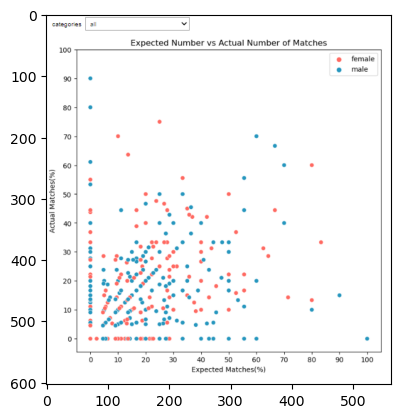

In [5]:
bothGenders = plt.imread('../screenshot/all.PNG')
plt.imshow(bothGenders)

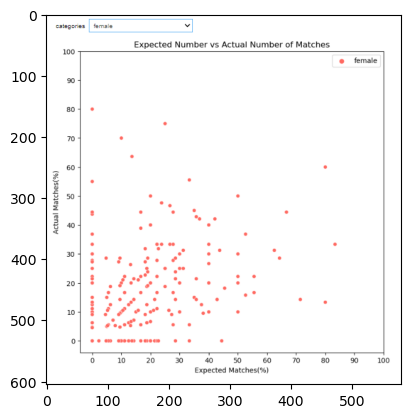

In [6]:
onlyFemale = plt.imread('../screenshot/female.PNG')
plt.imshow(onlyFemale)

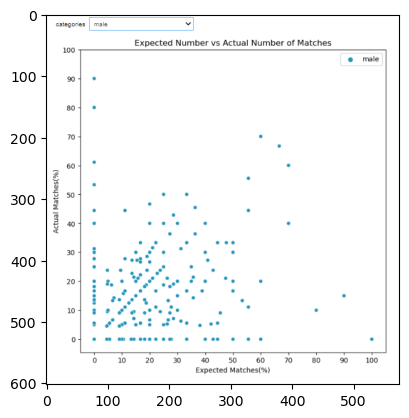

In [7]:
onlyMale = plt.imread('../screenshot/male.PNG')
plt.imshow(onlyMale)

#### Simple Hypothesis 2
<font size="3"> <i> People whose goal was "to get a date"/"looking for a serious relationship" got more matches than people whose goals was "to meet new people"/"seemed like a fun night out</i>

For our 2nd hypothesis, we calculate the mean & median number of matches from people with different goals for the speed dating events. </font>




In [12]:
goals_total = data_total[["iid","goal","total_matches"]].drop_duplicates()

# calculate mean and median of different groups
mm_df = goals_total.groupby("goal").agg(mean_matches = ("total_matches","mean"),
                                        median_matches = ("total_matches","median")).reset_index()

mm_df["mean_matches"] = round(mm_df["mean_matches"],2)
mm_df.head()

,goal,mean_matches,median_matches
0,0.0,2.14,1.0
1,1.0,2.56,2.0
2,2.0,2.56,2.0
3,3.0,2.50,2.0
4,4.0,2.32,2.0


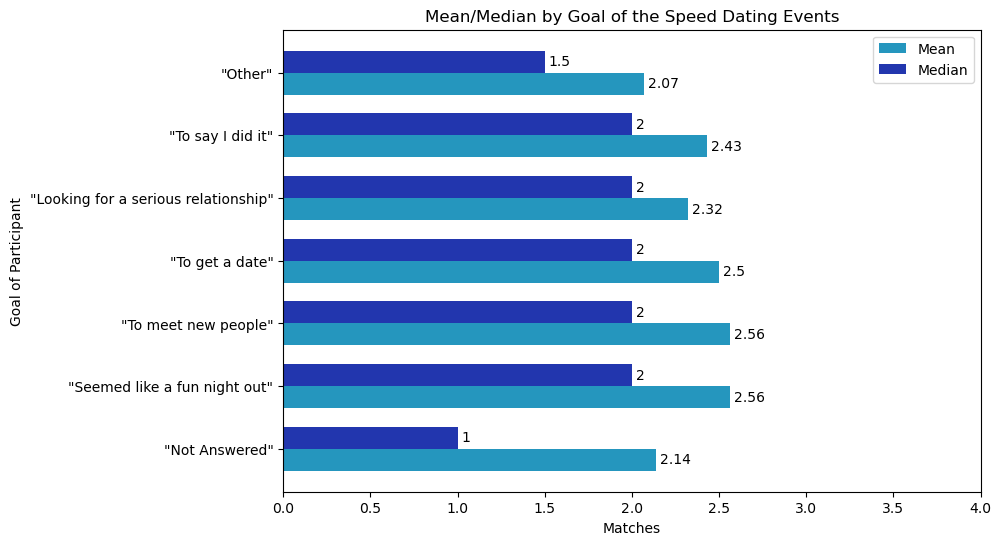

In [13]:
# means = mm_df["mean_matches"]
# medians = mm_df["median_matches"]
# ind = mm_df["goal"]


labels = [ "\"Not Answered\"",
    "\"Seemed like a fun night out\"",
        "\"To meet new people\"",
        "\"To get a date\"",
        "\"Looking for a serious relationship\"",
        "\"To say I did it\"",
        "\"Other\""]


#labels = [0,1,2,3,4,5,6]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(9, 6))
rects1 = ax.barh(x - width/2, mm_df["mean_matches"], width, label='Mean', color = ["#2596be"])
rects2 = ax.barh(x + width/2, mm_df["median_matches"], width, label='Median',color = ["#2236ae"])

plt.xticks(np.arange(0, 4.5, step=0.5))
ax.set_xlabel('Matches')
ax.set_ylabel('Goal of Participant')
ax.set_title('Mean/Median by Goal of the Speed Dating Events')
ax.set_yticks(x, labels,)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

#fig.tight_layout()

plt.show()

### Description



<font size="3">For our first hypothesis, we put the numbers of the participants expected partner matches in relation to their actual matches. Our conclusion is that the hypothesis turned out to be wrong as the scatter plot shows there are not too many diverging estimations. Clearly, there are quite some outliers in both directions, but the majority of data points are gathering in the 5-40% range without significant divergence.
For our second hypothesis we wanted to find out about the influence of the speed dating participant’s primary motivation on the success rate. We checked if the more ‘serious’ possible selections, which suggest higher commitment, would also lead to a higher success rate. Considering both the means and medians of actual matches, it turns out there are only very slight differences, proving the hypothesis to be wrong as the participant’s primary motivation obviously has almost no influence on the speed dating results.</font>